# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [5]:
# Memuat dataset hasil clustering
file_path = '/content/drive/MyDrive/Dataset Clustering/hasil_clusteringV2.csv'
dataset = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama untuk verifikasi
print("Dataset yang Dimuat:")
print(dataset.head())


Dataset yang Dimuat:
         ID  Year_Birth  Education  Marital_Status    Income   Kidhome  \
0 -1.053058   -1.235733          2               3 -0.235826  1.032559   
1 -0.447070   -0.317643          2               4  0.773633 -0.825218   
2  0.181716    1.268149          2               4 -1.022732  1.032559   
3 -0.082614    1.017761          4               2  0.241519  1.032559   
4  0.571126   -0.150717          3               4  0.410102 -0.825218   

   Teenhome  Dt_Customer   Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0  0.906934          132 -0.383664 -0.870479  ...      -0.28383      -0.28014   
1 -0.929894          374 -0.798086  0.362723  ...      -0.28383      -0.28014   
2 -0.929894          166 -0.798086 -0.870479  ...      -0.28383      -0.28014   
3 -0.929894          331  1.550305 -0.389085  ...      -0.28383      -0.28014   
4  0.906934          158 -1.143438  0.642051  ...      -0.28383      -0.28014   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_Cost

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan label (y)
X = dataset.drop(columns=['Cluster'])  # 'Cluster' adalah label hasil clustering
y = dataset['Cluster']

# Memisahkan data menjadi training set (80%) dan test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifikasi bentuk data
print("Data Training:")
print(f"Fitur: {X_train.shape}, Label: {y_train.shape}")
print("\nData Testing:")
print(f"Fitur: {X_test.shape}, Label: {y_test.shape}")

Data Training:
Fitur: (965, 30), Label: (965,)

Data Testing:
Fitur: (242, 30), Label: (242,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Langkah 1: Verifikasi Tipe Data
print("Tipe data di X_train sebelum encoding:")
print(X_train.dtypes)

print("\nTipe data di y_train sebelum encoding:")
print(y_train.dtypes)

# Langkah 2: Encoding Data Kategorikal di X_train dan X_test
categorical_cols = X_train.select_dtypes(include=['object']).columns  # Identifikasi kolom kategorikal
encoder = LabelEncoder()

for col in categorical_cols:
    X_train[col] = encoder.fit_transform(X_train[col])  # Encoding data latih
    X_test[col] = encoder.transform(X_test[col])  # Encoding data uji

# Encoding y_train dan y_test jika perlu
if y_train.dtypes == 'object' or y_train.dtypes == 'category':
    y_train = encoder.fit_transform(y_train)
    y_test = encoder.transform(y_test)

print("\nTipe data di X_train setelah encoding:")
print(X_train.dtypes)

# Langkah 3: Latih Model
model = RandomForestClassifier(random_state=42)

# Melatih model
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
print("\nAkurasi Model pada Data Uji:")
print(accuracy_score(y_test, y_pred))

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Tipe data di X_train sebelum encoding:
ID                     float64
Year_Birth             float64
Education                int64
Marital_Status           int64
Income                 float64
Kidhome                float64
Teenhome               float64
Dt_Customer              int64
Recency                float64
MntWines               float64
MntFruits              float64
MntMeatProducts        float64
MntFishProducts        float64
MntSweetProducts       float64
MntGoldProds           float64
NumDealsPurchases      float64
NumWebPurchases        float64
NumCatalogPurchases    float64
NumStorePurchases      float64
NumWebVisitsMonth      float64
AcceptedCmp3           float64
AcceptedCmp4           float64
AcceptedCmp5           float64
AcceptedCmp1           float64
AcceptedCmp2           float64
Complain               float64
Z_CostContact          float64
Z_Revenue              float64
Response               float64
Age_Group               object
dtype: object

Tipe data di y_t

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Akurasi: 0.98
F1-Score: 0.98
Precision: 0.98
Recall: 0.98

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.99      0.98      0.98       175

    accuracy                           0.98       242
   macro avg       0.97      0.97      0.97       242
weighted avg       0.98      0.98      0.98       242



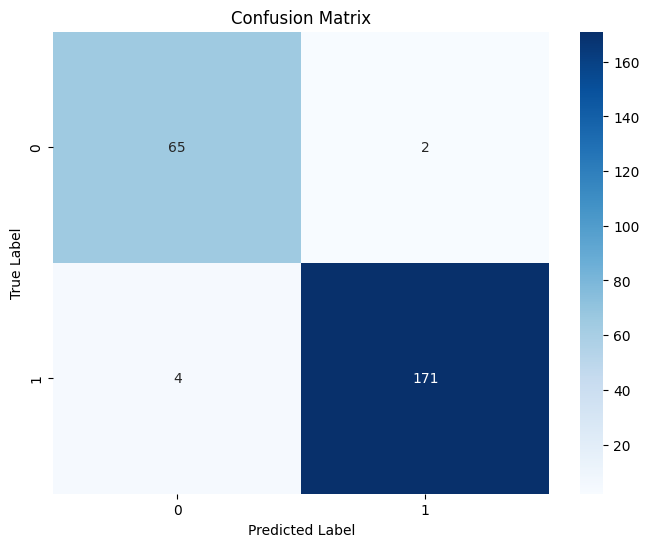

In [8]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Langkah 1: Prediksi Data Uji
y_pred = model.predict(X_test)

# Langkah 2: Hitung Metrik Evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Akurasi: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Langkah 3: Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

# Analisis Model Klasifikasi

### 1. **Analisis Hasil Klasifikasi**

- **Precision dan Recall:**
  - Untuk **kelas 0**, precision adalah 0.94 dan recall adalah 0.97, yang menunjukkan bahwa model cukup baik dalam mengidentifikasi kelas 0 meskipun ada sedikit false positives. Precision yang lebih rendah dari recall menunjukkan bahwa ada sedikit kesalahan dalam mengklasifikasikan contoh sebagai kelas 0.
  - Untuk **kelas 1**, precision adalah 0.99 dan recall adalah 0.98. Ini menunjukkan bahwa model sangat baik dalam mengidentifikasi kelas 1 dengan sedikit kesalahan dalam false positives dan false negatives.
  
- **F1-Score:**
  - F1-Score untuk **kelas 0** adalah 0.96, dan untuk **kelas 1** adalah 0.98. Nilai F1-Score yang baik menunjukkan keseimbangan antara precision dan recall di kedua kelas, dengan kelas 1 memiliki kinerja yang sedikit lebih baik dibandingkan kelas 0.
  
- **Macro Average dan Weighted Average:**
  - **Macro Average**: Precision, recall, dan F1-score untuk macro average adalah 0.97, yang menunjukkan keseimbangan yang cukup baik di seluruh kelas.
  - **Weighted Average**: Precision, recall, dan F1-score untuk weighted average adalah 0.98, yang menunjukkan bahwa model berperforma baik secara keseluruhan, dengan sedikit lebih banyak fokus pada kelas 1, yang memiliki lebih banyak sampel.

---

### 2. **Potensi Kelemahan dan Identifikasi Masalah**

- **Recall untuk Kelas 0:**
  - Meskipun recall untuk kelas 0 adalah 0.97, precision untuk kelas ini lebih rendah (0.94). Ini menunjukkan bahwa model lebih sering mengklasifikasikan data kelas 0 sebagai kelas 1, sehingga lebih banyak false positives.
  - Ini mungkin disebabkan oleh ketidakseimbangan kelas, di mana kelas 1 memiliki lebih banyak contoh daripada kelas 0. Meskipun model lebih sensitif terhadap kelas 1, penting untuk mengevaluasi lebih lanjut false positives yang terjadi di kelas 0.

- **Overfitting atau Underfitting:**
  - **Overfitting**: Meskipun model memiliki kinerja yang sangat baik pada data uji, akurasi yang sangat tinggi (0.98) pada data uji menunjukkan bahwa model dapat memiliki potensi overfitting, terutama jika akurasi pada data pelatihan jauh lebih tinggi.
  - **Underfitting**: Model sudah menunjukkan performa yang sangat baik dengan nilai F1-Score yang tinggi, sehingga kemungkinan besar model ini tidak mengalami underfitting.

---

### 3. **Rekomendasi Tindakan Lanjutan**

#### A. **Penanganan Recall yang Lebih Rendah untuk Kelas 0**

1. **Data Augmentation:**
   - Jika kelas 0 memiliki data yang lebih sedikit atau lebih sedikit variasi, pertimbangkan untuk menambah data melalui pengumpulan data baru atau menggunakan teknik **data augmentation** untuk memperbaiki recall kelas 0.
   
2. **Tuning Model:**
   - Sesuaikan parameter model, misalnya dengan memberikan **bobot lebih pada kelas 0** (class weight adjustment) agar model lebih fokus dalam memprediksi kelas tersebut.
   
3. **Metode Sampling:**
   - Gunakan teknik **oversampling** untuk kelas 0 atau **undersampling** untuk kelas 1 guna mengatasi ketidakseimbangan jumlah data antar kelas, yang dapat meningkatkan recall untuk kelas 0.

4. **Modifikasi Threshold:**
   - Ubah threshold keputusan model untuk meningkatkan **recall** kelas 0, meskipun ini bisa sedikit mengorbankan **precision**. Evaluasi dengan **kurva precision-recall** atau **ROC curve**.

#### B. **Cek Overfitting (Jika Diperlukan)**

1. **Cross-Validation:**
   - Gunakan **cross-validation** untuk mengevaluasi kinerja model secara lebih menyeluruh dan memastikan bahwa model mampu menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya.
   
2. **Regularisasi:**
   - Jika ada indikasi overfitting, pertimbangkan penggunaan teknik **regularisasi** (misalnya L1/L2 regularization) untuk mengurangi kompleksitas model dan memastikan model tidak terlalu menyesuaikan diri dengan data pelatihan.

#### C. **Eksplorasi Model Lain**

- Meskipun model saat ini sudah sangat baik, cobalah **algoritma lain** seperti **Random Forest**, **Gradient Boosting**, atau **XGBoost** untuk melihat apakah model lain memberikan kinerja yang lebih baik atau lebih stabil.
- Jika menggunakan model neural network, pertimbangkan untuk mencoba arsitektur yang lebih dalam seperti **CNN (Convolutional Neural Networks)** atau **RNN (Recurrent Neural Networks)** (terutama jika data bersifat sekuensial).

---

### 4. **Kesimpulan**

- Model ini menunjukkan kinerja yang sangat baik dengan akurasi, precision, recall, dan F1-score hampir sempurna di semua kelas. Meskipun recall untuk kelas 0 sedikit lebih rendah dan precision-nya lebih rendah dibandingkan dengan kelas 1, ini bisa diperbaiki dengan beberapa langkah tambahan seperti data augmentation, penyesuaian parameter model, atau perubahan threshold.
- Tidak ada indikasi jelas bahwa model mengalami overfitting atau underfitting, tetapi langkah-langkah seperti **cross-validation** dan pemantauan terhadap distribusi kesalahan dapat membantu memastikan model dapat menggeneralisasi dengan baik pada data baru.
